# Analysis of song lyrics
- This notebook analyzes the dataset of the top ~8.5k streamed songs(with available lyrics). The data includes the top 5 words from each song.

In [55]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Import data and merge

In [32]:
# Import top word data
file = pd.read_csv("Resources/lyrics_and_top_words.csv")

# Display
file

,Unnamed: 0.1,Unnamed: 0,Artist Name,Song Name,Lyrics,Top Words (1),Top Words (2),Top Words (3),Top Words (4),Top Words (5),Used a Top Word
0,0,0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,"[Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...",sunflower,wreck,bad,baby,unless,True
1,1,1,Juice WRLD,Lucid Dreams,"Enviyon on the mix\nNo, no, no, no\nNo-no, no,...",heart,one,made,love,gave,True
2,2,2,Lil Uzi Vert,XO TOUR Llif3,"Are you alright?\nI'm alright, I'm quite alrig...",dead,friends,edge,push,way,True
3,3,3,J. Cole,No Role Modelz,First things first rest in peace Uncle Phil\nF...,shallow,back,hook,love,one,True
4,4,4,Post Malone,rockstar,"[Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...",rockstar,pow,man,ta,star,True
...,...,...,...,...,...,...,...,...,...,...,...
11079,11079,11079,The Band Perry,If I Die Young,0,NaN,NaN,NaN,NaN,NaN,False
11080,11080,11080,Justin Timberlake,Not a Bad Thing,[Verse 1:]\nSaid all I want from you is to see...,love,fall,bad,find,time,True
11081,11081,11081,Mike WiLL Made,It 23,0,NaN,NaN,NaN,NaN,NaN,False
11082,11082,11082,The Vamps,Somebody To You,0,NaN,NaN,NaN,NaN,NaN,False


In [34]:
# Import streaming data
full = pd.read_csv("Resources/top_10k_streamed_songs.csv")
full = full[["Song Name","Total Streams"]]
full

,Song Name,Total Streams
0,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,Lucid Dreams,864832399
2,XO TOUR Llif3,781153024
3,No Role Modelz,734857487
4,rockstar,718865961
...,...,...
11079,If I Die Young,51321
11080,Not a Bad Thing,49512
11081,It 23,46547
11082,Somebody To You,44962


In [40]:
# Merge top words with streaming data
df = full.merge(file,how="left",left_index=True,right_index=True)

# Remove empty lyric data
df = df.loc[df["Lyrics"] != "0"]

# Remove unnecesary columns
df = df[["Artist Name","Song Name_x","Total Streams","Top Words (1)","Top Words (2)","Top Words (3)","Top Words (4)","Top Words (5)","Used a Top Word"]]

# Display data
df

,Artist Name,Song Name_x,Total Streams,Top Words (1),Top Words (2),Top Words (3),Top Words (4),Top Words (5),Used a Top Word
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738,sunflower,wreck,bad,baby,unless,True
1,Juice WRLD,Lucid Dreams,864832399,heart,one,made,love,gave,True
2,Lil Uzi Vert,XO TOUR Llif3,781153024,dead,friends,edge,push,way,True
3,J. Cole,No Role Modelz,734857487,shallow,back,hook,love,one,True
4,Post Malone,rockstar,718865961,rockstar,pow,man,ta,star,True
...,...,...,...,...,...,...,...,...,...
11073,Train,Angel in Blue Jeans,54133,whoa,down,different,though,love,True
11074,Dillon Francis,All That,53784,dumb,party,look,turn,hook,False
11076,Lit,My Own Worst Enemy,52701,gone,please,tell,clothes,said,True
11078,Icona Pop,I Love It,51604,love,care,into,car,bridge,True


# Compare songs that "Use a top word" to songs that don't

In [41]:
# Split by songs that used a top word and didn't use a top word
top_word = df.loc[df["Used a Top Word"] == True]
flop_word = df.loc[df["Used a Top Word"] == False]

# Display top
top_word

,Artist Name,Song Name_x,Total Streams,Top Words (1),Top Words (2),Top Words (3),Top Words (4),Top Words (5),Used a Top Word
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738,sunflower,wreck,bad,baby,unless,True
1,Juice WRLD,Lucid Dreams,864832399,heart,one,made,love,gave,True
2,Lil Uzi Vert,XO TOUR Llif3,781153024,dead,friends,edge,push,way,True
3,J. Cole,No Role Modelz,734857487,shallow,back,hook,love,one,True
4,Post Malone,rockstar,718865961,rockstar,pow,man,ta,star,True
...,...,...,...,...,...,...,...,...,...
11070,Cold War Kids,First,55182,first,light,now,worried,candle,True
11073,Train,Angel in Blue Jeans,54133,whoa,down,different,though,love,True
11076,Lit,My Own Worst Enemy,52701,gone,please,tell,clothes,said,True
11078,Icona Pop,I Love It,51604,love,care,into,car,bridge,True


In [42]:
# Display not top
flop_word

,Artist Name,Song Name_x,Total Streams,Top Words (1),Top Words (2),Top Words (3),Top Words (4),Top Words (5),Used a Top Word
7,XXXTENTACION,Jocelyn Flores,624457164,pain,feelin',well,same,hold,False
8,XXXTENTACION,SAD!,619879245,sad,ever,try,decide,someone,False
12,Travis Scott,SICKO MODE,586638599,said,light,travis,scott,play,False
17,Drake,God's Plan,534994242,wishin',bad,g,plan,god's,False
18,Roddy Ricch,The Box,504210201,box,put,told,soul,slatt,False
...,...,...,...,...,...,...,...,...,...
11054,Rihanna,Pon de Replay,61742,mr,dj,turn,music,pon,False
11056,Leighton Meester,Run Away,60357,run,away,lost,home,past,False
11059,Bahari,Wild Ones,60039,ones,wild,howl,moon,trapped,False
11072,B.o.B,John Doe,54377,oooh,john,doe,maybe,ohooh,False


In [45]:
# Calculate sum of top
top_word_sum = top_word["Total Streams"].sum()
top_word_sum

116545080047

In [46]:
# Calculate sum of not top
flop_word_sum = flop_word["Total Streams"].sum()
flop_word_sum

41027930838

In [48]:
# Calculate count of top
top_word_count = len(top_word)
top_word_count

6054

In [50]:
# Calculate count of not top
flop_word_count = len(flop_word)
flop_word_count

2432

In [51]:
# Calculate average of top
top_word_avg = top_word_sum/top_word_count
top_word_avg

19250921.71242154

In [52]:
# Calculate average of not top
flop_word_avg = flop_word_sum/flop_word_count
flop_word_avg

16870037.351151317

Text(0.5, 1.0, 'Song Includes a Top 25 Word')

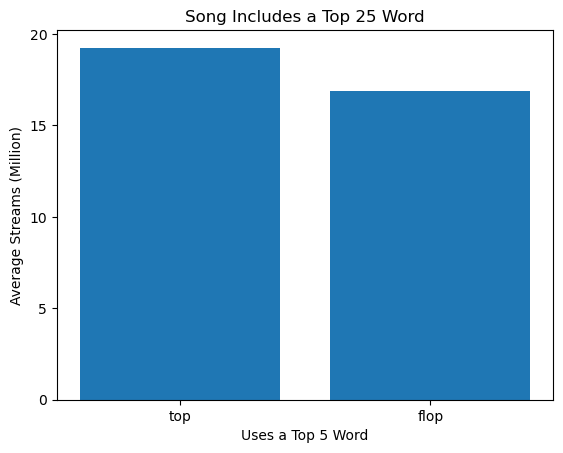

In [292]:
# Generate bar plot of top vs not top average streams
plt.bar(["top","flop"],[top_word_avg,flop_word_avg])
plt.yticks(labels=[0,5,10,15,20],ticks=[0,5000000,10000000,15000000,20000000])
plt.ylabel("Average Streams (Million)")
plt.xlabel("Uses a Top 25 Word")
plt.title("Song Includes a Top 25 Word")


In [54]:
# Calculate difference
dif = top_word_avg - flop_word_avg
dif

2380884.361270223

# Compare most popular words

Text(0.5, 1.0, 'Top Lyrics in Popular Songs')

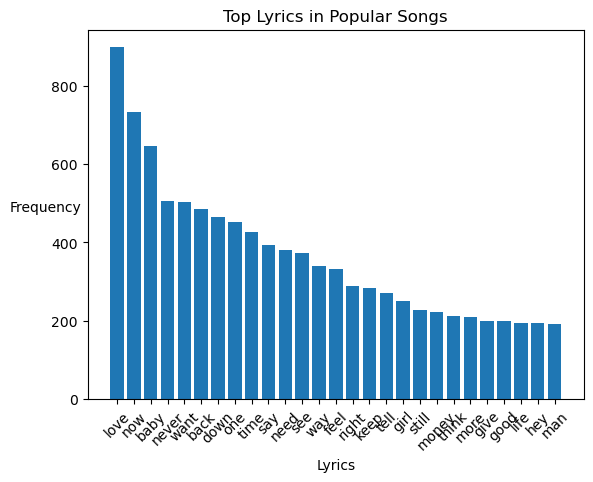

In [133]:
# Generate list of top words
x = ["love",
     "now",
     "baby",
     "never",
     "want",
     "back",
     "down",
     "one",
     "time",
     "say",
     "need",
     "see",
     "way",
     "feel",
     "right",
     "keep",
     "tell",
     "girl",
     "still",
     "money",
     "think",
     "more",
     "give",
     "good",
     "life",
     "hey",
     "man"]
# Value count for the words
y = [898,733,646,506,502,486,465,453,426,393,381,373,339,332,289,285,270,251,228,222,213,210,200,199,195,194,192]

# Generate plot of count for top words
plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("Lyrics")
plt.ylabel("Frequency",rotation=0)
plt.title("Top Lyrics in Popular Songs")
plt.savefig("Resources/top_lyrics")

# Compare streaming averages for words

In [260]:
# Generate list of top words for streaming averages
ipb = df["Top Words (1)"].value_counts()

# Remove singleton words
ipb = ipb.loc[ipb>1]

# Display list
ipb

Top Words (1)
love         292
now          152
baby         146
want         141
back         126
            ... 
trying         2
heartless      2
kick           2
dangerous      2
maniac         2
Name: count, Length: 902, dtype: int64

In [261]:
# Create lists for storing data from loop
d = []
e = []
f = []

# Loop through data and collect streaming values for songs containing each of the top words
for j in range(len(ipb)):
    a = ipb.index[j]
    b=0
    # Loop through all 5 columns of top words in df
    for i in range(5):
        b = b + df["Total Streams"].loc[df[f"Top Words ({i+1})"] == a].sum()
        c = df["Total Streams"].loc[df[f"Top Words ({i+1})"] == a].mean()
        print(a,b)
        # Record data
        d.append(a)
        e.append(b)
        f.append(c)
    
# Display
d

love 5486012047
love 10091995353
love 12663375886
love 16149072308
love 18060637104
now 2374818232
now 4851854815
now 8275668019
now 10942839752
now 13096301433
baby 2964340463
baby 5311406782
baby 8757813424
baby 12074241948
baby 14241673643
want 3173541009
want 5572107012
want 8378940182
want 10012164852
want 11006694864
back 2569120049
back 4088694329
back 5847361774
back 7431462032
back 9282655115
never 1528289104
never 3426897639
never 4238020786
never 6554001021
never 7503247122
down 2256112628
down 3905882366
down 5132199917
down 6220174972
down 9055598115
one 1630455942
one 4343243101
one 6190672828
one 7575235558
one 9706531616
time 733125257
time 2174047828
time 3955087254
time 5936859489
time 7633733492
see 622447288
see 1315884880
see 3818298605
see 4761931903
see 5662610764
feel 648565846
feel 1561608327
feel 2954485494
feel 4170592580
feel 5040979488
say 1706228806
say 3404207771
say 4984429849
say 6324844740
say 8670646346
way 1019826293
way 1616229747
way 2667750681
way

['love',
 'love',
 'love',
 'love',
 'love',
 'now',
 'now',
 'now',
 'now',
 'now',
 'baby',
 'baby',
 'baby',
 'baby',
 'baby',
 'want',
 'want',
 'want',
 'want',
 'want',
 'back',
 'back',
 'back',
 'back',
 'back',
 'never',
 'never',
 'never',
 'never',
 'never',
 'down',
 'down',
 'down',
 'down',
 'down',
 'one',
 'one',
 'one',
 'one',
 'one',
 'time',
 'time',
 'time',
 'time',
 'time',
 'see',
 'see',
 'see',
 'see',
 'see',
 'feel',
 'feel',
 'feel',
 'feel',
 'feel',
 'say',
 'say',
 'say',
 'say',
 'say',
 'way',
 'way',
 'way',
 'way',
 'way',
 'need',
 'need',
 'need',
 'need',
 'need',
 'keep',
 'keep',
 'keep',
 'keep',
 'keep',
 'right',
 'right',
 'right',
 'right',
 'right',
 'hey',
 'hey',
 'hey',
 'hey',
 'hey',
 'money',
 'money',
 'money',
 'money',
 'money',
 'girl',
 'girl',
 'girl',
 'girl',
 'girl',
 'more',
 'more',
 'more',
 'more',
 'more',
 'good',
 'good',
 'good',
 'good',
 'good',
 'na',
 'na',
 'na',
 'na',
 'na',
 'still',
 'still',
 'still',
 'sti

In [262]:
# Generate new df with data from loop
avg_hb = pd.DataFrame({"Word":d,
                       "Sum":e,
                       "Average":f,
                       "Frequency":0})


# Remove duplicates
avg_hb = avg_hb.drop_duplicates(subset="Word",keep="last")

# Sort by highest average
avg_hb = avg_hb.sort_values(by="Average",ascending=False)





# Display
avg_hb.head(25)

,Word,Sum,Average,Frequency
2979,holiday,277584556,2.765299e+08,0
2244,blame,1176002411,2.073775e+08,0
2184,throw,1707018159,1.531750e+08,0
994,yourself,543769306,1.531081e+08,0
2914,star,788967209,1.441883e+08,0
4049,duh,447425190,1.376066e+08,0
2079,wasted,548469539,1.292760e+08,0
2449,throat,140233600,1.263495e+08,0
3804,write,492841957,1.219551e+08,0
3574,daddy,550522354,1.163140e+08,0


In [263]:
# Loop through df, record frequency for each word
for k in range(len(avg_hb)):
        
        q = avg_hb.iloc[k,0]

        cnt = ipb[q]

        avg_hb.iloc[k,3] = cnt
        





In [264]:
# Display with new frequency values
avg_hb

,Word,Sum,Average,Frequency
2979,holiday,277584556,2.765299e+08,2
2244,blame,1176002411,2.073775e+08,4
2184,throw,1707018159,1.531750e+08,4
994,yourself,543769306,1.531081e+08,8
2914,star,788967209,1.441883e+08,3
...,...,...,...,...
4474,pow,836345974,NaN,2
4479,jealousy,213530828,NaN,2
4494,heartless,126566212,NaN,2
4499,kick,21760758,NaN,2


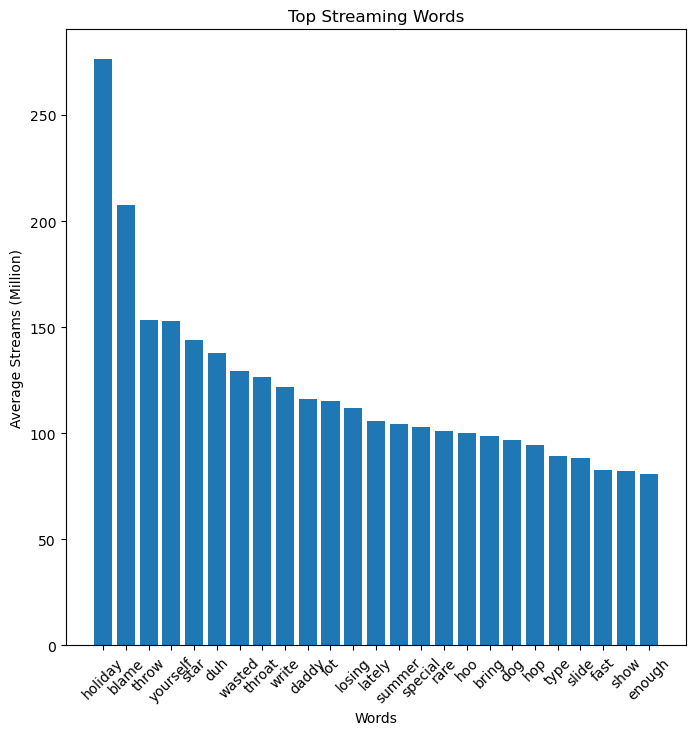

In [284]:
# Generate plot of average streaming values for the top 25 words with highest average streaming
plt.figure(figsize=(8,8))
plt.bar(avg_hb["Word"].head(25),avg_hb["Average"].head(25))
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Average Streams (Million)")
plt.title("Top Streams per Word")
plt.yticks(labels=[0,50,100,150,200,250],ticks=[0,50000000,100000000,150000000,200000000,250000000])
plt.savefig("Resources/top_streaming_words")


# Conclusion
- "Love" is the most popular notable(not common) word used in popular song lyrics.
- "Holiday" is the notable word with the highest average streams.